## Phase 2

### Header
#### Course Name: 
#### phase #: 2
#### term project name:

### Q Write down the following information: 
#### 1. Problem Statement: 



#### 2. Hypothesis: 
As the rent and home values rise for a puma in New York city, potentially this would cause the decrease of n - 2 race category percentage in that puma, assuming n is the total number of race categories. This would cause a leak in diversity in certain pumas where a single or dual race caterology begins to dominate, we define this as gentraication in this project. We predict that the puma with the highest risk of gentrifying are the pumas that have a history of increasing home value and percentage of rent to income, as well as an increase in only white racial percentage. 

#### 3 Cleaned Datasets
Display the cleaned dataset after phase 1


In [31]:
# import your cleaned dataset
import pandas as pd 
df= pd.read_csv('data_imputated.csv')
df.head()
# display the first five rows data.head(5)

,puma,year,mergeid,estimate_black_females,estimate_total_pop,percent_black_only,percent_black_women,quantile_black_women,gini_index,percent_second_mortgage,...,disability_status,total_housing_units,num_renter_occupied,num_owner_occupied,num_total_occupied,percent_born_us,english_prof,percent_college,percent_uninsured,percent_unemployed
0,3603701,2011,3603701 _ 2011,8349,106558,14.3,7.835170,3,0.4852,14.0,...,14.349000,45433,28757,12714,41471,62.3,20.3,38.7,11.983000,6.3
1,3603702,2011,3603702 _ 2011,56929,144403,70.4,39.423696,5,0.4291,14.9,...,11.125000,51321,29678,17780,47458,56.1,7.7,22.1,14.353333,8.5
2,3603703,2011,3603703 _ 2011,17630,115784,27.2,15.226629,4,0.4293,13.6,...,13.975333,48946,23433,22537,45970,76.3,10.2,24.2,9.534667,5.5
3,3603704,2011,3603704 _ 2011,15386,125976,23.0,12.213437,3,0.4500,19.0,...,13.169000,47577,31071,13398,44469,58.9,21.2,23.2,13.788667,6.4
4,3603705,2011,3603705 _ 2011,30973,154386,36.4,20.062052,4,0.4847,12.1,...,14.863333,55842,47237,3850,51087,60.8,28.5,9.7,15.490667,8.4


In [33]:
import geopandas as gpd
import zipfile 
from io import BytesIO
import geopandas as gpd
from urllib.request import urlopen
import json
#Please repeat if it does not work
with urlopen('https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycd_21a.zip') as response:
    file = zipfile.ZipFile(BytesIO(response.read()))
    file.extractall('community_districts_shapefiles/')
gdf = gpd.read_file('community_districts_shapefiles/nycd_21a/nycd.shp')
borough = {'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'}

In [38]:
cds_dict = {
'Bronx' :  {1:3710,
            2:3710,
            3:3705, 
            6:3705, 
            4:3708, 
            5:3707, 
            7:3706, 
            8:3701, 
            9:3709, 
            10:3703, 
            11:3704, 
            12:3702}, 
'Manhattan': {
            1:3810,  
            2:3810, 
            3:3809, 
            4:3807,
            5:3807, 
            6:3808, 
            7:3806, 
            8:3805, 
            9:3802, 
            10:3803, 
            11:3804,
            12:3801},
'Staten Island': {
            1:3903, 
            2:3902, 
            3:3901},
'Brooklyn': {
            1:4001, 
            2:4004, 
            3:4003, 
            4:4002, 
            5:4008, 
            6:4005, 
            7:4012, 
            8:4006, 
            9:4011, 
            10:4013,
            11:4017, 
            12:4014, 
            13:4018, 
            14:4015, 
            15:4016, 
            16:4007,
            17:4010, 
            18:4009},
'Queens':  {  
            1:4101, 
            2:4109, 
            3:4102,
            4:4107, 
            5:4110,
            6:4108,
            7:4103, 
            8:4106, 
            9:4111, 
            10:4113, 
            11:4104,
            12:4112,
            13:4105,
            14:4114}}
borough = {'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'}
gdf['Borough'] = gdf['BoroCD'].astype(str).str[0].map(borough)
gdf['CD'] = gdf['BoroCD'].astype(str).str[1:].astype(int)
import numpy as np 
def apply_cd(x):
    try:
        return cds_dict[x['Borough']][x['CD']]
    except:
        return np.nan
gdf['PUMA'] = gdf.apply(lambda x: apply_cd(x), axis = 1)

#### 4 EDA  
Read the piazza post for reference https://piazza.com/class/kk6xmjqekrl1e9?cid=154

**4.1 Method 1**

#### operation name: geostpatial analyzation of variables
#### Reason for doing this: the reason for doing this is so that we are able to find locations where the values of a specific variable are. Once found, we hope to see clustering that may help us pic spatial lag features
#### Outcome: We see that clustering does exist 

In [110]:
# code for operation
import geopandas as gpd

import matplotlib.pyplot as plt 
import contextily as ctx
imputated_df = df.copy()
dict_geoms = gdf.set_index('PUMA')['geometry'].to_dict()
imputated_df['puma_id'] = imputated_df['puma'].astype(str).str[3:]

imputated_df['geometry'] = imputated_df['puma_id'].astype(float).apply(lambda x :dict_geoms[x])

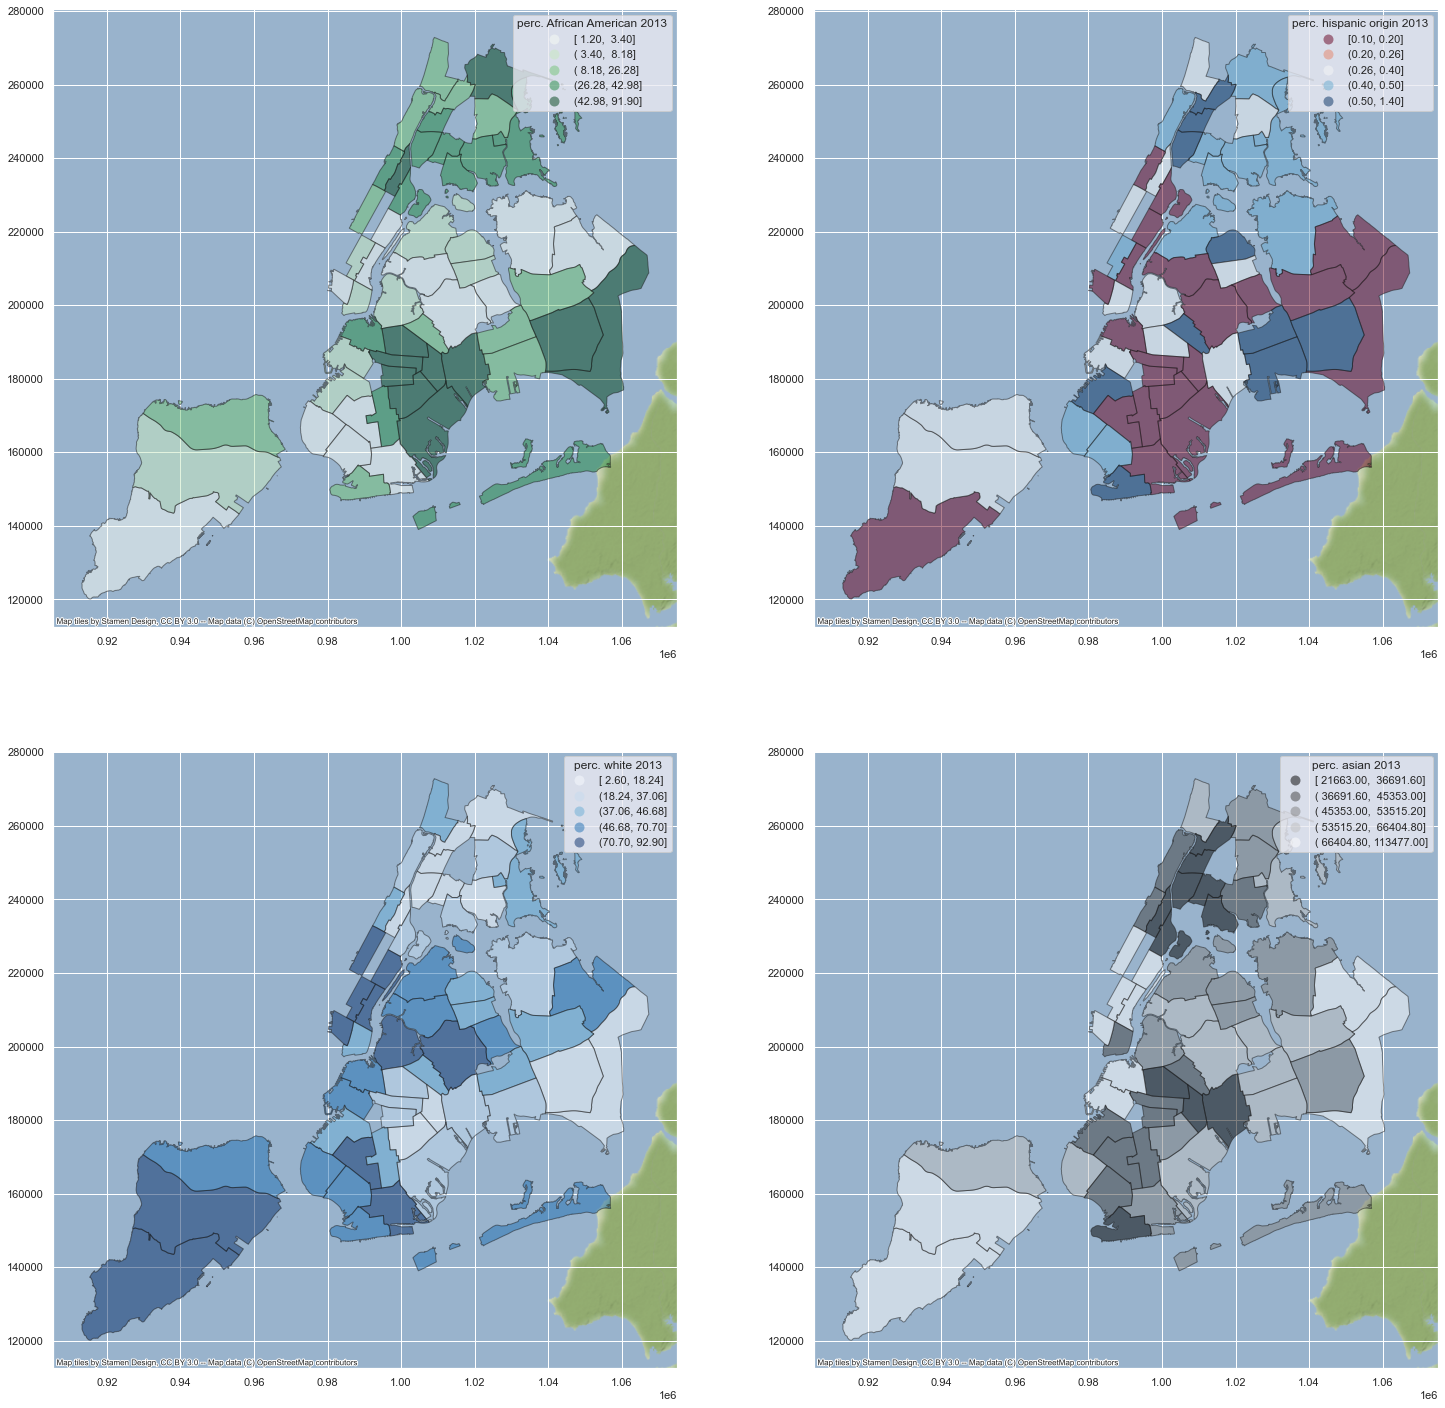

In [111]:
# code for display
import matplotlib.pyplot as plt
gdf_DI = gpd.GeoDataFrame(imputated_df, geometry = 'geometry')
yr_gdf = gdf_DI[gdf_DI['year'] == 2013].copy()


fig, axs = plt.subplots(2, 2,figsize=(25,25))
yr_gdf.plot(column = 'percent_black_only',ax = axs[0,0] ,alpha=0.5, edgecolor='k',cmap='Greens', scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. African American 2013'}) # red is increase tax
yr_gdf.plot(column = 'percent_american_indian',ax = axs[0,1] , alpha=0.5, edgecolor='k',cmap= 'RdBu',scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. hispanic origin 2013'}) # 10 decrease in african american  
yr_gdf.plot(column = 'percent_white_only',ax = axs[1,0] ,alpha=0.5, edgecolor='k',cmap='Blues', scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. white 2013'}) # red is increase tax
yr_gdf.plot(column = 'median_income',ax = axs[1,1] , alpha=0.5, edgecolor='k',cmap= 'gray',scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. asian 2013'}) # 10 decrease in african american 
ctx.add_basemap(axs[0,0])
ctx.add_basemap(axs[0,1])
ctx.add_basemap(axs[1,0])
ctx.add_basemap(axs[1,1])

**4.2 Method 2**

#### operation name: Moran Statistic to find spatial dependency 
#### Reason for doing this:
#### Outcome: that means we can use spatial lag as a new feature from which we can train the data on!  this means we are able to use spatial lag models. 

In [122]:
# code for operation
# MORAN STATISTIC 
from esda.moran import Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
import pysal as ps 

dropping_duplicates = imputated_df.drop_duplicates('puma_id')
w = ps.lib.weights.Queen.from_dataframe(dropping_duplicates, idVariable='puma_id')
w.transform = 'r'

('WARNING: ', '4114', ' is an island (no neighbors)')


In [123]:
imputated_df

,puma,year,mergeid,estimate_black_females,estimate_total_pop,percent_black_only,percent_black_women,quantile_black_women,gini_index,percent_second_mortgage,...,num_renter_occupied,num_owner_occupied,num_total_occupied,percent_born_us,english_prof,percent_college,percent_uninsured,percent_unemployed,puma_id,geometry
0,3603701,2011,3603701 _ 2011,8349,106558,14.3,7.835170,3,0.4852,14.000000,...,28757,12714,41471,62.3,20.3,38.7,11.983000,6.3,3701,"POLYGON ((1012820.693 271349.052, 1012821.477 ..."
1,3603702,2011,3603702 _ 2011,56929,144403,70.4,39.423696,5,0.4291,14.900000,...,29678,17780,47458,56.1,7.7,22.1,14.353333,8.5,3702,"POLYGON ((1041252.473 261280.034, 1041167.230 ..."
2,3603703,2011,3603703 _ 2011,17630,115784,27.2,15.226629,4,0.4293,13.600000,...,23433,22537,45970,76.3,10.2,24.2,9.534667,5.5,3703,"MULTIPOLYGON (((1042822.450 243439.814, 104255..."
3,3603704,2011,3603704 _ 2011,15386,125976,23.0,12.213437,3,0.4500,19.000000,...,31071,13398,44469,58.9,21.2,23.2,13.788667,6.4,3704,"POLYGON ((1031732.164 252970.294, 1031709.189 ..."
4,3603705,2011,3603705 _ 2011,30973,154386,36.4,20.062052,4,0.4847,12.100000,...,47237,3850,51087,60.8,28.5,9.7,15.490667,8.4,3705,"POLYGON ((1017255.596 244431.387, 1017249.730 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,3604110,2017,3604110 _ 2017,1531,181598,1.8,0.843071,1,0.4319,9.787541,...,35426,26353,61779,57.4,23.4,27.5,12.000000,3.8,4110,"POLYGON ((1015372.060 206818.665, 1015537.002 ..."
381,3604111,2017,3604111 _ 2017,5266,155032,6.3,3.396718,2,0.4262,8.285055,...,23994,20760,44754,45.7,26.6,26.2,12.600000,4.7,4111,"POLYGON ((1034962.285 195826.459, 1034998.739 ..."
382,3604112,2017,3604112 _ 2017,84438,244302,63.2,34.562959,5,0.4276,9.560914,...,36407,34880,71287,55.4,14.3,21.0,10.800000,7.1,4112,"POLYGON ((1039267.326 182097.875, 1039271.417 ..."
383,3604113,2017,3604113 _ 2017,11475,138868,15.8,8.263243,3,0.4412,7.386304,...,13367,25992,39359,51.5,13.3,21.3,10.000000,5.7,4113,"MULTIPOLYGON (((1023868.747 176222.723, 102336..."


In [124]:

y = df_2015 = imputated_df[imputated_df['year'] == 2015][['puma_id','percent_black_only','geometry']]
x = df_2014 = imputated_df[imputated_df['year'] == 2014][['puma_id','percent_black_only','geometry']]
merged = x.merge(y, on = ['puma_id','geometry'],how = 'inner')
w = ps.lib.weights.Queen.from_dataframe(merged, idVariable='puma_id')
y_val = merged['percent_black_only_y']
x_val = merged['percent_black_only_x']

C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\pysal\lib\weights\contiguity.py:185: UserWarning: There is one disconnected observation (no neighbors).
Island id: 4114
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', '4114', ' is an island (no neighbors)')


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Bivariate Moran Scatterplot (0.48)'}, xlabel='Attribute X', ylabel='Spatial Lag of Y'>)

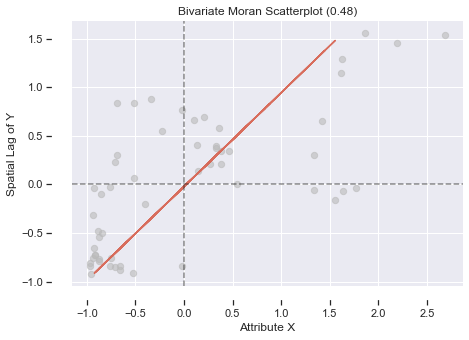

In [125]:
# code for display
moran_bv = Moran_BV(y_val, x_val, w)
moran_scatterplot(moran_bv)

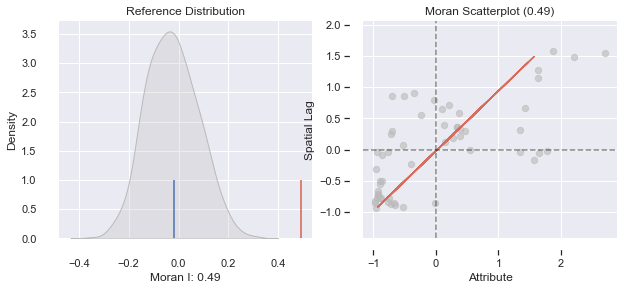

In [126]:
from splot.esda import moran_scatterplot
from splot.esda import plot_moran
from esda.moran import Moran
moran = Moran(y_val,w)
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [129]:
# huge spatial dependency we reject the null hypothesis 
print( "P-value of moran Bi-variate on a yearly basis: " + str(moran_bv.p_sim))
print( "P-value of Moran statistics of a single variable: "+ str(moran.p_z_sim))

P-value of moran Bi-variate on a yearly basis: 0.001
P-value of Moran statistics of a single variable: 3.535493313666649e-07


**4.3 Method 3**

#### operation name:
#### Reason for doing this: we may be able 
#### Outcome:

In [144]:
# code for operation
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,11.27)})
corr_df = imputated_df.drop(['puma_id','puma','mergeid', 'year'], axis = 1)
corr = corr_df.corr()

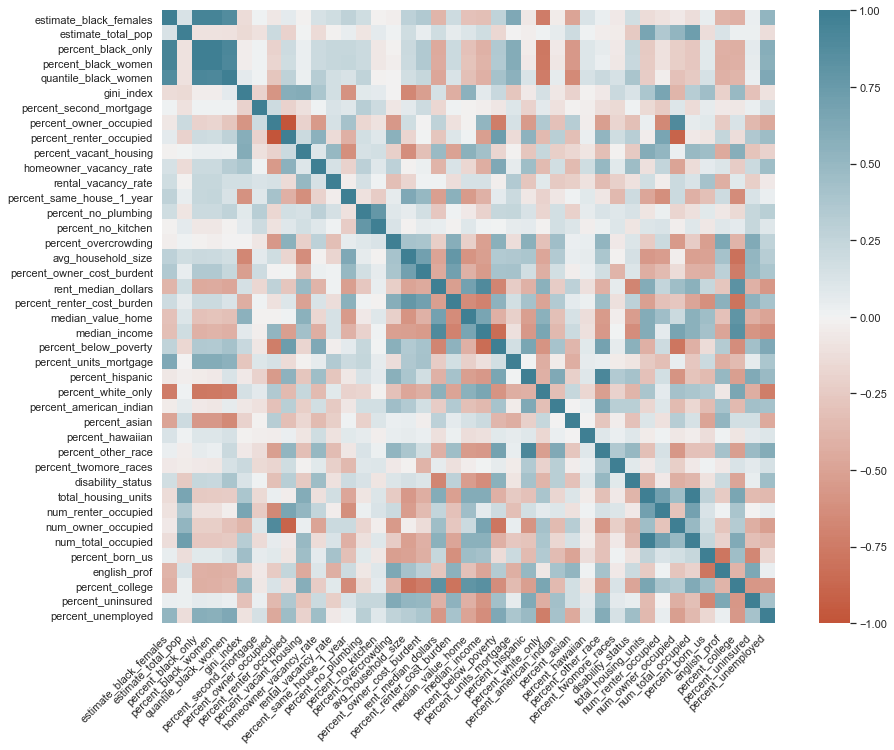

In [145]:
# code for display
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**4.4 Method 4**

#### operation name:
#### Reason for doing this: we may be able to do dimensionality reductions
#### Outcome:

In [ ]:
# please run this 
# !pip install pca 

In [150]:
# code for operation
from pca import pca
from sklearn import preprocessing
df2 = imputated_df.drop(['puma_id','puma','mergeid', 'year','geometry'], axis = 1).copy()

model = pca()
# Fit transform

out = model.fit_transform(pd.DataFrame(preprocessing.StandardScaler().fit_transform(df2), columns =  df2.columns))

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [41] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [16] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


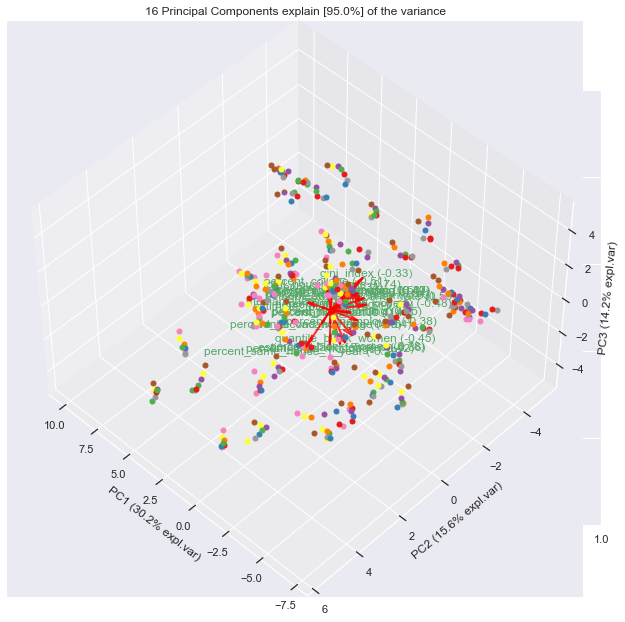

(<Figure size 720x576 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x23784e0d548>)

In [152]:
model.biplot3d(legend = False)

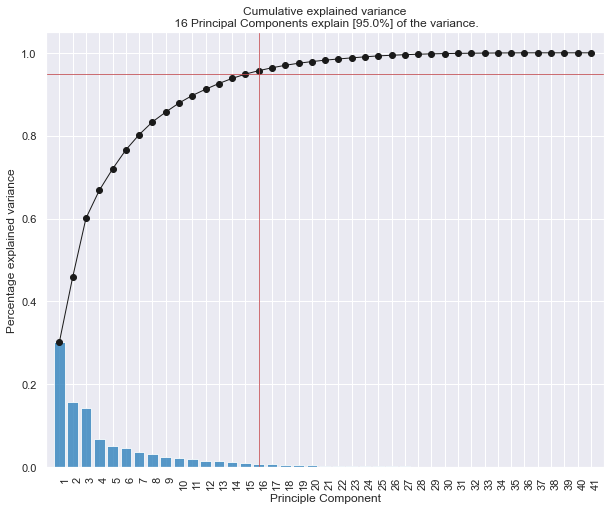

      PC                     feature   loading  type
0    PC1               median_income  0.261053  best
1    PC2                  gini_index -0.330497  best
2    PC3                english_prof  0.342393  best
3    PC4          estimate_total_pop  0.510654  best
4    PC5         percent_no_plumbing  0.545439  best
5    PC6       percent_twomore_races  0.535911  best
6    PC7           disability_status  0.404871  best
7    PC8            percent_hawaiian  0.409388  best
8    PC9            percent_hawaiian  0.829627  best
9   PC10     percent_second_mortgage -0.542407  best
10  PC11     percent_second_mortgage -0.481414  best
11  PC12       percent_twomore_races  0.495000  best
12  PC13     percent_american_indian  0.628451  best
13  PC14      homeowner_vacancy_rate  0.589841  best
14  PC15        percent_overcrowding  0.395961  best
15  PC16     percent_american_indian  0.440206  best
16  PC17      percent_vacant_housing  0.368388  best
17  PC18      percent_units_mortgage -0.421107

<Figure size 1130.4x811.44 with 0 Axes>

In [153]:
model.plot()
print(out['topfeat'])

**4.5 Method 5**

#### operation name: 
Developing New Features
#### Reason for doing this: 
To get the most imperative element feature in our process to prove the relationship between migration of races, while considering general income and fluctuation in housing/rent per year by puma in New York City.
#### Outcome: 
The new feature of rent as a percentage of income can better reflect on the reason for leaving their current residency as it does account for both rent and income change.

In [11]:
# code for operation
import pandas as pd 
from collections import Counter
from statistics import mean 
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd 
file = pd.read_csv('census_puma_nyc_2011-2017.csv')
years = list(Counter(file['year']).keys())
dataDict = {}
yearZipGR = {}
yearZipGr = {}
df = {}
rentMedDlr = file['rent_median_dollars']
medInc = file['median_income']
    
shortestCol = min(len(rentMedDlr),len(medInc))
newFeatureList = [0] * shortestCol

for i in range(shortestCol):
    x = rentMedDlr[i] 
    y = medInc[i]
    if x>0 and y>0:
        newFeatureList[i] = (x/y) * 100
file = pd.concat([file,pd.Series(newFeatureList, name = 'rent_as_percentage_of_income')], axis= 1)

In [12]:
# code for display
file

,Unnamed: 0,puma,year,mergeid,estimate_black_females,estimate_total_pop,percent_black_only,percent_black_women,quantile_black_women,gini_index,...,total_housing_units,num_renter_occupied,num_owner_occupied,num_total_occupied,percent_born_us,english_prof,percent_college,percent_uninsured,percent_unemployed,rent_as_percentage_of_income
0,1,3603701,2011,3603701 _ 2011,8349,106558,14.3,7.835170,3,0.4852,...,45433,28757,12714,41471,62.3,20.3,38.7,NaN,6.3,2.056317
1,2,3603702,2011,3603702 _ 2011,56929,144403,70.4,39.423696,5,0.4291,...,51321,29678,17780,47458,56.1,7.7,22.1,NaN,8.5,2.295054
2,3,3603703,2011,3603703 _ 2011,17630,115784,27.2,15.226629,4,0.4293,...,48946,23433,22537,45970,76.3,10.2,24.2,NaN,5.5,1.916790
3,4,3603704,2011,3603704 _ 2011,15386,125976,23.0,12.213437,3,0.4500,...,47577,31071,13398,44469,58.9,21.2,23.2,NaN,6.4,2.305003
4,5,3603705,2011,3603705 _ 2011,30973,154386,36.4,20.062052,4,0.4847,...,55842,47237,3850,51087,60.8,28.5,9.7,NaN,8.4,3.774696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,381,3604110,2017,3604110 _ 2017,1531,181598,1.8,0.843071,1,0.4319,...,67293,35426,26353,61779,57.4,23.4,27.5,12.0,3.8,2.078363
381,382,3604111,2017,3604111 _ 2017,5266,155032,6.3,3.396718,2,0.4262,...,48492,23994,20760,44754,45.7,26.6,26.2,12.6,4.7,2.233277
382,383,3604112,2017,3604112 _ 2017,84438,244302,63.2,34.562959,5,0.4276,...,76446,36407,34880,71287,55.4,14.3,21.0,10.8,7.1,2.142430
383,384,3604113,2017,3604113 _ 2017,11475,138868,15.8,8.263243,3,0.4412,...,42527,13367,25992,39359,51.5,13.3,21.3,10.0,5.7,2.107627


**4.6 Method 6**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [13]:
# code for operation

In [14]:
# code for display

**4.7 Method 7**

#### operation name: 
Puma's rent as percentage of income by year
#### Reason for doing this: 
In order to successfully measure gentrification or the risk of gentrification we need to define a feature that dictates the reason for such migrations, usually this is caused by rent increase or income being static over years as inflation stimulates the rent cost to increase. 
#### Outcome: 
The percentage movement from 2011-2017 by puma, this is a representation of affordability- as percent is low it is affordable and percent increase it is less affordable, this prepares us to see which puma is affordable and the race ratio in that puma.  

In [15]:
# code for operation
years = list(Counter(file['year']).keys())
puma = list(Counter(file['puma']).keys())

for year in years[:]:
    yearZipGr[year] = {} 
    file1 = file[file['year'] == year]
    for p in puma:        
        yearZipGr[year][p] = mean(list(file1[file1['puma'] == p]['rent_as_percentage_of_income']))

df = {}
df['year'] = list(yearZipGr.keys())

for p in puma:
    df[p] = []
    for year in yearZipGr:
        df[p].append(yearZipGr[year][p])
            
df = pd.DataFrame(data = df)
df

,year,3603701,3603702,3603703,3603704,3603705,3603706,3603707,3603708,3603709,...,3604105,3604106,3604107,3604108,3604109,3604110,3604111,3604112,3604113,3604114
0,2011,2.056317,2.295054,1.916790,2.305003,3.774696,3.343485,3.620906,3.505911,2.573374,...,1.742035,2.127064,2.827046,2.040042,2.343793,2.218115,2.244617,2.056071,2.069089,1.958689
1,2012,2.105723,2.410967,1.957309,2.397697,3.987773,3.499366,3.840050,3.571298,2.626173,...,1.791910,2.170324,2.922085,2.085426,2.471094,2.263771,2.251646,2.112240,2.142799,2.024039
2,2013,2.166209,2.440788,2.007807,2.432595,3.996387,3.543800,3.949219,3.732607,2.854730,...,1.837909,2.221499,2.946266,2.167187,2.465040,2.304364,2.209491,2.162698,2.136924,2.000967
3,2014,2.163466,2.558347,2.019632,2.509507,4.089555,3.604861,4.189303,3.950814,2.901139,...,1.865840,2.239210,2.992394,2.300732,2.539100,2.267987,2.227706,2.226751,2.200068,2.113675
4,2015,2.128793,2.593597,2.017921,2.574236,4.065041,3.573759,4.382371,4.028409,2.978513,...,1.889236,2.229336,3.023986,2.227345,2.600668,2.228982,2.277747,2.219952,2.189980,2.138885
5,2016,2.203428,2.578019,1.995515,2.560067,3.935049,3.562263,4.452447,3.973876,3.032382,...,1.882431,2.235198,3.104870,2.224984,2.541809,2.164681,2.281296,2.215459,2.149205,2.161736
6,2017,2.218969,2.511578,1.978243,2.557816,3.905121,3.559497,4.217959,3.951756,3.016444,...,1.865685,2.303015,3.055172,2.257442,2.515595,2.078363,2.233277,2.142430,2.107627,2.189311


In [16]:
# code for display
fig = px.line(df, x='year', y = puma)
fig.show()

**4.8 Method 8**
 
#### operation name: 
Defining standard for gentrification
#### Reason for doing this:
As we all know gentrification is when a side effect occurs due to the impact of land and property development in that neighborhood, the rent of home value will rise along with the property tax, therefore many people leave their home, however most of the home mirgrants tends to be racial minorities causing racial enclaves. We here define what minorities are, how diversity should be standardized, and what to consider as not impacted by gentrification.   
#### Outcome: 
As the percentage of white population Increase it corresponds to a higher median home value in a puma, this implies that the puma with the highest home value is also the least diverse comparatively and all the puma with a high diversity ratio meaning lower white percentage has a poorer median value homes.  

In [17]:
# code for operation
for year in years[:]:
    yearZipGr[year] = file[file['year'] == year]

In [18]:
# code for display
for y in yearZipGr:
    print(y)
    fig = go.Figure(data=go.Scattergl(
        x = yearZipGr[y]['percent_white_only'],
        y = yearZipGr[y]['median_value_home'],
        mode='markers',
        marker=dict(
            colorscale='Viridis',
            line_width=1
        )
    ))
    fig.show()

2011


2012


2013


2014


2015


2016


2017


**4.9 Method 9**

#### operation name: 
Analyzing rent growth
#### Reason for doing this: 
This is a crucial part of our process to predict which areas will have a higher chances of gentrifying, this shows the growth of rent from all pumas from 2011-2017, therefore we can compare it to the change in race from that period to define which races is the least effect in gentrification. in order ro get the best comparison we will graph out the rent growth and take the period with the biggest fluctuations and compare it to the race ratio change. 
#### Outcome: 
The biggest fluctuation of rent growth is in 2013 to 2016 therefore these values would weigh more than others.

In [19]:
# code for operation

years = list(Counter(file['year']).keys())
puma = list(Counter(file['puma']).keys())

for year in years[:]:
    yearZipGr[year] = {} 
    file1 = file[file['year'] == year]
    for p in puma:        
        yearZipGr[year][p] = mean(list(file1[file1['puma'] == p]['rent_median_dollars']))

df = {}
df['year'] = list(yearZipGr.keys())

for p in puma:
    df[p] = []
    for year in yearZipGr:
        df[p].append(yearZipGr[year][p])
            
df = pd.DataFrame(data = df)
df

,year,3603701,3603702,3603703,3603704,3603705,3603706,3603707,3603708,3603709,...,3604105,3604106,3604107,3604108,3604109,3604110,3604111,3604112,3604113,3604114
0,2011,1110,1077,1026,1055,833,1032,954,946,975,...,1356,1215,1256,1345,1284,1212,1254,1081,1268,935
1,2012,1156,1115,1038,1091,861,1077,992,979,1010,...,1379,1275,1301,1370,1340,1258,1289,1125,1310,975
2,2013,1192,1148,1075,1135,885,1104,1011,1014,1048,...,1428,1297,1345,1401,1382,1273,1319,1157,1325,993
3,2014,1220,1174,1109,1168,906,1136,1041,1041,1072,...,1450,1324,1373,1434,1440,1305,1354,1180,1355,1013
4,2015,1239,1186,1108,1192,920,1150,1059,1055,1084,...,1459,1344,1378,1459,1479,1319,1382,1195,1366,1050
5,2016,1287,1216,1130,1220,933,1166,1088,1077,1105,...,1474,1401,1393,1504,1529,1361,1422,1223,1405,1069
6,2017,1334,1269,1162,1252,973,1204,1117,1114,1141,...,1531,1443,1437,1591,1609,1420,1459,1253,1464,1122


In [20]:
# code for display
fig = px.line(df, x='year', y= puma)
fig.show()

**4.10 Method 10**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

### Submission guideline:
1. write your code and report in this notebook. 
2. save this notebook as <person1ubname_person2ubname.ipynb>.
3. save your raw data in data folder.
4. save the notebook file with data folder in a folder named <person1ubname_person2ubname.zip>. 
5. upload your zip file to the ub learns.

**Each person from a team needs to make submissions.**

### Grading:
    0 – no submission by deadline
    5 – with 0-3 valid and non-repeating EDA operations;
    10 – with 4-8 valid and non-repeating EDA operations;
    15 – with 9 valid and non-repeating EDA operations;
    20 - with 10 valid and non-repeating EDA operations;
    25 - Completely master EDA and every step is perfect;
    
Once the deadline is past, you get a zero for the phase if you did not submit anything, even though you need to complete the phase to work on the next phase.
